### Logistic regression classifier on syntetic dataset

<IPython.core.display.Javascript object>


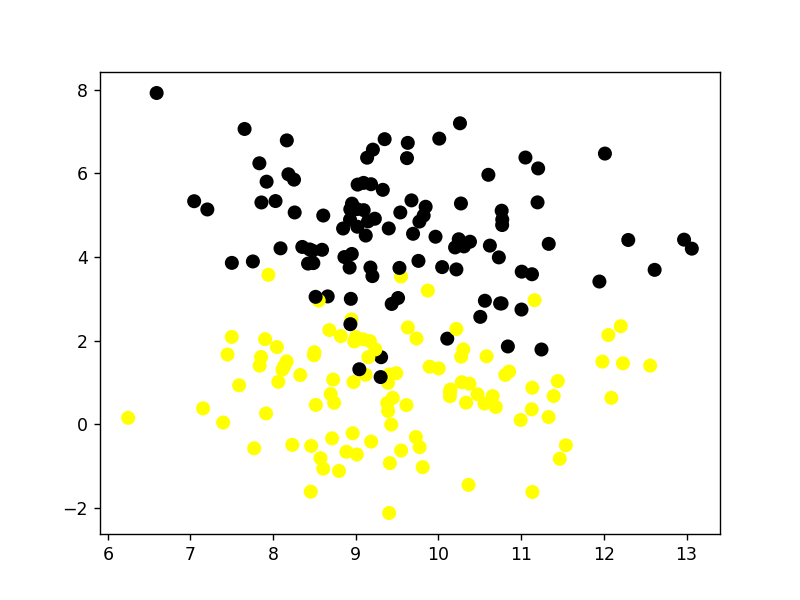

Logistic regression classifier 
  LogisticRegression(C=1)
Accuracy of LR classifier on training set: 0.95
Accuracy of LR classifier on test set: 0.90


array([[ 9.69240141e+00,  4.55354958e+00],
       [ 1.11358553e+01, -1.61863402e+00],
       [ 1.10037617e+01,  2.74273920e+00],
       [ 9.43405438e+00,  2.87649677e+00],
       [ 9.30613446e+00,  1.60347819e+00],
       [ 1.22952898e+01,  4.40556328e+00],
       [ 1.12053451e+01,  6.11652891e+00],
       [ 1.03631797e+01, -1.44849364e+00],
       [ 8.93984991e+00,  2.99882265e+00],
       [ 8.95158997e+00,  4.07178405e+00],
       [ 9.87107240e+00,  3.19676304e+00],
       [ 8.60629490e+00,  4.99006853e+00],
       [ 8.16550001e+00,  6.78614692e+00],
       [ 8.16352720e+00,  1.50399771e+00],
       [ 1.06937751e+01,  4.13399578e-01],
       [ 1.01448674e+01,  8.30261977e-01],
       [ 1.15406618e+01, -5.02010816e-01],
       [ 9.23019425e+00,  4.91420647e+00],
       [ 8.96217224e+00, -2.13623468e-01],
       [ 7.85365864e+00,  1.60754070e+00],
       [ 1.11275680e+01,  3.58289201e-01],
       [ 8.45510382e+00, -1.61117415e+00],
       [ 9.40378069e+00,  1.18988505e+00],
       [ 8.

In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2,  centers = 2, 
                        cluster_std = 1.3, random_state = 4)
plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, 
                                                    random_state = 0)
clf = LogisticRegression(C=1, solver='lbfgs')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Logistic regression classifier \n ', clf)
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

X_D2

[[22  2]
 [ 3 23]]


<IPython.core.display.Javascript object>


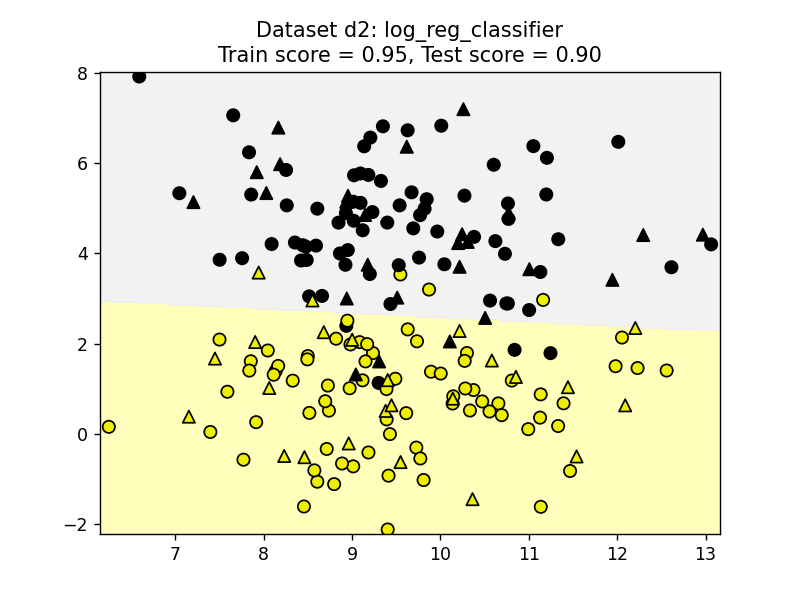

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
from adspy_shared_utilities import plot_class_regions_for_classifier

print(confusion_matrix(y_test,predictions))
plot_class_regions_for_classifier(clf,X_train,y_train, X_test, y_test, 'Dataset d2: log_reg_classifier')

In [10]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, l1_ratio=None,max_iter=100,
                  multi_class='warn',n_jobs=None, penalty='l2',
                  random_state=0, solver='libliner', tol=0.0001,verbose=0,
                  warm_start=False)

model = LogisticRegression(solver='liblinear',random_state=0).fit(X_test, y_test)
print(classification_report(y_test,model.predict(X_test)))
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.88      0.85      0.86        26

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        76
           1       0.93      0.96      0.95        74

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
dataset = pd.read_csv('iris.csv')

In [6]:
dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
X = dataset.iloc[:, [0,1,2, 3]].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
####################################################################################
print('Оценка качества классификатора')
print('Accuracy of LR classifier on training set: {:.2f}'
 .format(classifier.score(X_train, y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'
 .format(classifier.score(X_test, y_test)))

print('\n')
####################################################################################
print('Матрица ошибок \n',confusion_matrix(classifier.predict(X_train), y_train))

print('\n')
####################################################################################
print('Тренировочные данные: \n')
print(classification_report(y_train,classifier.predict(X_train)))

print('Тестовые данные: \n')
print(classification_report(y_test,y_pred))

Оценка качества классификатора
Accuracy of LR classifier on training set: 0.97
Accuracy of LR classifier on test set: 0.97


Матрица ошибок 
 [[37  0  0]
 [ 0 32  1]
 [ 0  2 40]]


Тренировочные данные: 

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        37
  Versicolor       0.97      0.94      0.96        34
   Virginica       0.95      0.98      0.96        41

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112

Тестовые данные: 

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.94      0.97        16
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



<IPython.core.display.Javascript object>


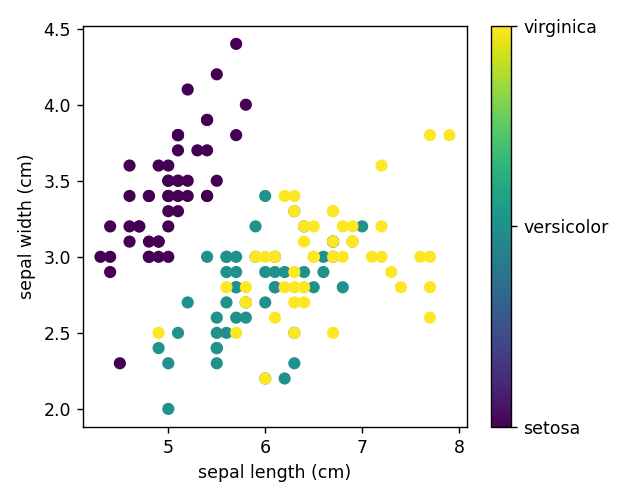

In [33]:
iris = datasets.load_iris()
x_index 9
plt.show()